## Crypto Arbitrage

In this Challenge, you'll take on the role of an analyst at a high-tech investment firm. The vice president (VP) of your department is considering arbitrage opportunities in Bitcoin and other cryptocurrencies. As Bitcoin trades on markets across the globe, can you capitalize on simultaneous price dislocations in those markets by using the powers of Pandas?

For this assignment, you’ll sort through historical trade data for Bitcoin on two exchanges: Bitstamp and Coinbase. Your task is to apply the three phases of financial analysis to determine if any arbitrage opportunities exist for Bitcoin.

This aspect of the Challenge will consist of 3 phases.

1. Collect the data.

2. Prepare the data.

3. Analyze the data. 



###  Import the required libraries and dependencies.

In [2]:
import pandas as pd
from pathlib import Path
%matplotlib inline

## Collect the Data

To collect the data that you’ll need, complete the following steps:

Instructions. 

1. Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

2. Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

3. Repeat Steps 1 and 2 for `coinbase.csv` file.

### Step 1: Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

In [3]:
# Read in the CSV file called "bitstamp.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Date"
# Set the parse_dates and infer_datetime_format parameters
bitstamp = pd.read_csv(Path("./Resources/bitstamp.csv"),
                        index_col="Timestamp",
                        parse_dates=True,
                        infer_datetime_format=True
                      )                     

### Step 2: Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

In [25]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
bitstamp.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329


### Step 3: Repeat Steps 1 and 2 for `coinbase.csv` file.

In [4]:
# Read in the CSV file called "coinbase.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Timestamp"
# Set the parse_dates and infer_datetime_format parameters
coinbase = pd.read_csv(Path("./Resources/coinbase.csv"),
                       index_col="Timestamp",
                       parse_dates=True,
                       infer_datetime_format=True
                      )

In [5]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
coinbase.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,$13608.49,20.812754,283451.08537,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,$13601.66,13.474359,183283.97801,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,$13580.0,11.536360,156789.19686,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,$13550.34,16.328039,221413.64182,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,$13583.44,9.955364,135141.26944,13574.719401


## Prepare the Data

To prepare and clean your data for analysis, complete the following steps:

1. For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

2. Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

3. Convert the data type of the Close column to a `float`.

4. Review the data for duplicated values, and drop them if necessary.

5. Repeat Steps 1–4 for the coinbase DataFrame.

### Step 1: For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

In [6]:
# For the bitstamp DataFrame, replace or drop all NaNs or missing values in the DataFrame
bitstamp = bitstamp.dropna()
bitstamp.isnull().sum()

Open              0
High              0
Low               0
Close             0
BTC Volume        0
USD Volume        0
Weighted Price    0
dtype: int64

### Step 2: Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

In [7]:
# Use the str.replace function to remove the dollar sign, $
bitstamp.loc[:,"Close"] = bitstamp.loc[:,"Close"].str.replace("$","")
bitstamp

/Applications/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,13620.0,1.069665,14582.660932,13632.923329
...,...,...,...,...,...,...,...
2018-03-31 23:55:00,6935.01,6939.07,6922.56,6922.56,1.044354,7240.034602,6932.550078
2018-03-31 23:56:00,6922.02,6922.02,6918.00,6920.32,3.069539,21245.076275,6921.260233
2018-03-31 23:57:00,6920.33,6936.42,6920.33,6934.72,28.239049,195789.408220,6933.286106


### Step 3: Convert the data type of the Close column to a `float`.

In [8]:
# Convert the Close data type to a float
bitstamp.loc[:,"Close"] = bitstamp.loc[:,"Close"].astype("float")
bitstamp.dtypes

Open              float64
High              float64
Low               float64
Close             float64
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

### Step 4: Review the data for duplicated values, and drop them if necessary.

In [9]:
# Review the data for duplicate values, and drop them if necessary
bitstamp.duplicated().sum()

0

### Step 5: Repeat Steps 1–4 for the coinbase DataFrame.

In [10]:
# Repeat Steps 1–4 for the coinbase DataFrame
coinbase = coinbase.dropna()
coinbase.isnull().sum()

coinbase.loc[:,"Close"] = coinbase.loc[:,"Close"].str.replace("$","")
coinbase.loc[:,"Close"] = coinbase.loc[:,"Close"].astype("float")
coinbase.dtypes

/Applications/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """


Open              float64
High              float64
Low               float64
Close             float64
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

## Analyze the Data

Your analysis consists of the following tasks: 

1. Choose the columns of data on which to focus your analysis.

2. Get the summary statistics and plot the data.

3. Focus your analysis on specific dates.

4. Calculate the arbitrage profits.

### Step 1: Choose columns of data on which to focus your analysis.

Select the data you want to analyze. Use `loc` or `iloc` to select the following columns of data for both the bitstamp and coinbase DataFrames:

* Timestamp (index)

* Close


In [11]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from bitstamp DataFrame
bitstamp_sliced = bitstamp.loc[:, ["Close"]]

# Review the first five rows of the DataFrame
bitstamp_sliced.head()

,Close
Timestamp,
2018-01-01 00:00:00,13646.48
2018-01-01 00:01:00,13658.75
2018-01-01 00:02:00,13610.22
2018-01-01 00:03:00,13639.09
2018-01-01 00:04:00,13620.00


In [12]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from coinbase DataFrame
coinbase_sliced = coinbase.iloc[:,[3]]

# Review the first five rows of the DataFrame
coinbase_sliced.head()

,Close
Timestamp,
2018-01-01 00:00:00,13608.49
2018-01-01 00:01:00,13601.66
2018-01-01 00:02:00,13580.00
2018-01-01 00:03:00,13550.34
2018-01-01 00:04:00,13583.44


### Step 2: Get summary statistics and plot the data.

Sort through the time series data associated with the bitstamp and coinbase DataFrames to identify potential arbitrage opportunities. To do so, complete the following steps:

1. Generate the summary statistics for each DataFrame by using the `describe` function.

2. For each DataFrame, create a line plot for the full period of time in the dataset. Be sure to tailor the figure size, title, and color to each visualization.

3. In one plot, overlay the visualizations that you created in Step 2 for bitstamp and coinbase. Be sure to adjust the legend and title for this new visualization.

4. Using the `loc` and `plot` functions, plot the price action of the assets on each exchange for different dates and times. Your goal is to evaluate how the spread between the two exchanges changed across the time period that the datasets define. Did the degree of spread change as time progressed?

In [13]:
# Generate the summary statistics for the bitstamp DataFrame
bitstamp_sliced.describe()

,Close
count,129067.000000
mean,10459.842453
std,2315.976088
min,5944.000000
25%,8613.370000
50%,10145.950000
75%,11444.810000
max,17234.980000


In [14]:
# Generate the summary statistics for the coinbase DataFrame
coinbase_sliced.describe()

,Close
count,129322.000000
mean,10449.140958
std,2317.197419
min,5882.310000
25%,8609.230000
50%,10137.440000
75%,11397.237500
max,17177.990000


<AxesSubplot:title={'center':'Bitstamp Prices'}, xlabel='Timestamp'>

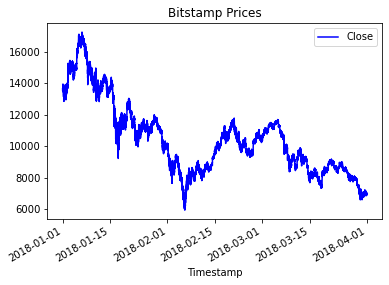

In [15]:
# Create a line plot for the bitstamp DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
bitstamp_sliced.plot(figsize=(6,4), title='Bitstamp Prices', color='blue', xlabel='Timestamp')

<AxesSubplot:title={'center':'Coinbase Prices'}, xlabel='Timestamp'>

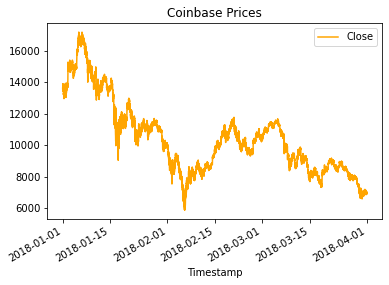

In [16]:
# Create a line plot for the coinbase DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
coinbase_sliced.plot(figsize=(6,4), color='orange', title='Coinbase Prices', xlabel='Timestamp')

<AxesSubplot:title={'center':'Bitstamp vs Coinbase'}, xlabel='Timestamp'>

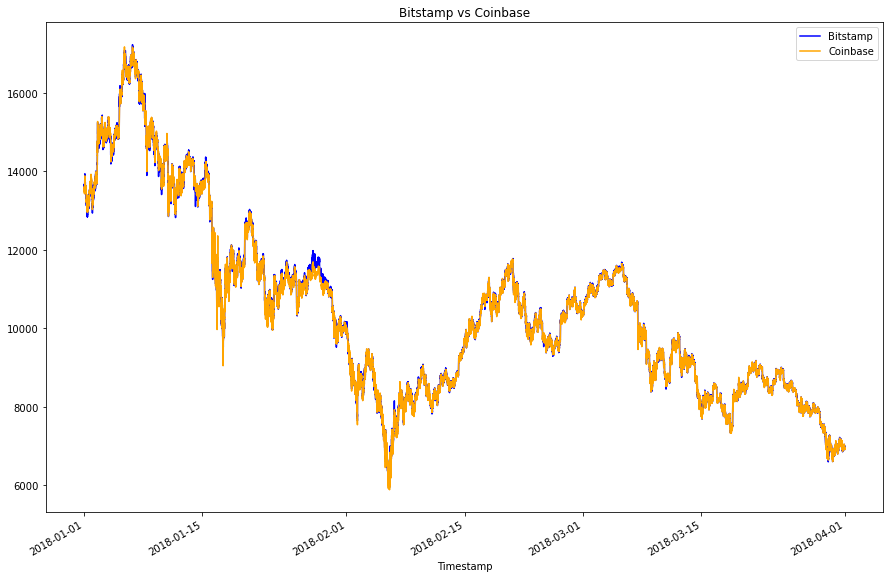

In [17]:
# Overlay the visualizations for the bitstamp and coinbase DataFrames in one plot
# The plot should visualize the prices over the full lenth of the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
bitstamp_sliced['Close'].plot(figsize=(15,10), color='blue', legend=True, title="Bitstamp vs Coinbase", label="Bitstamp", xlabel="Timestamp")
coinbase_sliced['Close'].plot(figsize=(15,10), color="orange", legend=True, label="Coinbase")


<AxesSubplot:title={'center':'Bitstamp vs Coinbase'}, xlabel='Timestamp'>

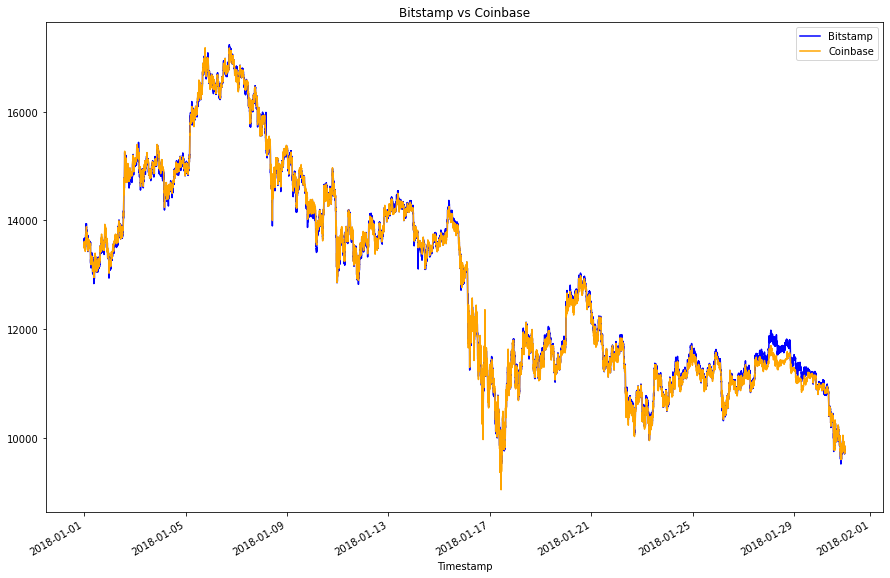

In [18]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period early in the dataset
bitstamp_sliced['Close'].loc['2018/01/01':'2018/01/30'].plot(figsize=(15,10), color='blue', legend=True, title="Bitstamp vs Coinbase", label="Bitstamp", xlabel="Timestamp")
coinbase_sliced['Close'].loc['2018/01/01':'2018/01/30'].plot(figsize=(15,10), color="orange", legend=True, label="Coinbase")

<AxesSubplot:title={'center':'Bitstamp vs Coinbase'}, xlabel='Timestamp'>

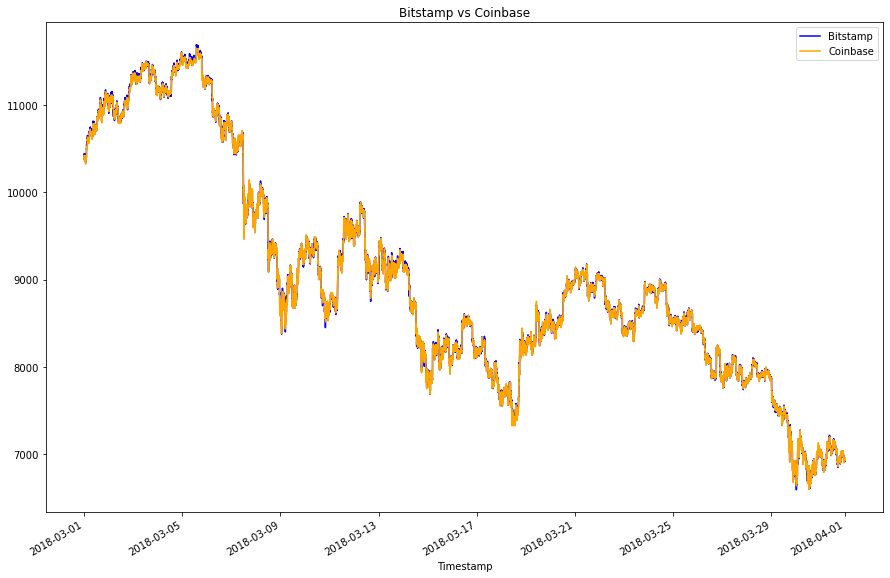

In [19]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period later in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label 
bitstamp_sliced['Close'].loc['2018/03/01':'2018/04/01'].plot(figsize=(15,10), color='blue', legend=True, title="Bitstamp vs Coinbase", label="Bitstamp", xlabel="Timestamp")
coinbase_sliced['Close'].loc['2018/03/01':'2018/04/01'].plot(figsize=(15,10), color="orange", legend=True, label="Coinbase")

**Question** Based on the visualizations of the different time periods, has the degree of spread change as time progressed?

**Answer** based on the images, the earlier period appears to have larger spreads than the later period.

### Step 3: Focus Your Analysis on Specific Dates

Focus your analysis on specific dates by completing the following steps:

1. Select three dates to evaluate for arbitrage profitability. Choose one date that’s early in the dataset, one from the middle of the dataset, and one from the later part of the time period.

2. For each of the three dates, generate the summary statistics and then create a box plot. This big-picture view is meant to help you gain a better understanding of the data before you perform your arbitrage calculations. As you compare the data, what conclusions can you draw?

<AxesSubplot:title={'center':'Bitstamp vs Coinbase'}, xlabel='Timestamp'>

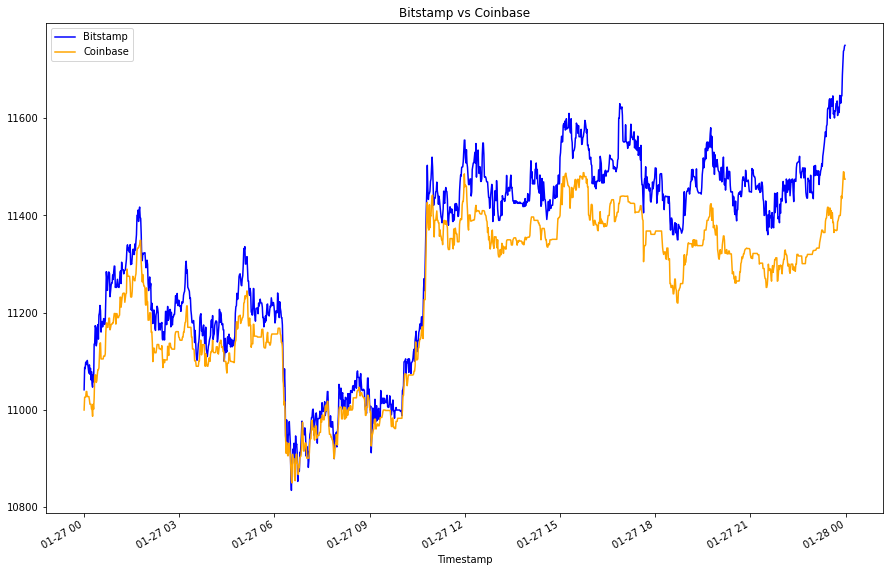

In [20]:
# Create an overlay plot that visualizes the two dataframes over a period of one day early in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp_sliced['Close'].loc['2018/01/27'].plot(figsize=(15,10), color='blue', legend=True, title="Bitstamp vs Coinbase", label="Bitstamp", xlabel="Timestamp")
coinbase_sliced['Close'].loc['2018/01/27'].plot(figsize=(15,10), color="orange", legend=True, label="Coinbase")

In [21]:
# Using the early date that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices.
### instructions say to subtract "bitstamp lower from coinbase higher prices", but I reversed that 
### because coinbase is the majoirty lower price here.

arbitrage_spread_early = bitstamp_sliced.loc['2018/01/27'] - coinbase_sliced.loc['2018/01/27']

# Generate summary statistics for the early DataFrame
arbitrage_spread_early.describe()

,Close
count,1421.000000
mean,84.558600
std,51.823073
min,-35.950000
25%,47.430000
50%,75.940000
75%,116.180000
max,275.380000


<AxesSubplot:>

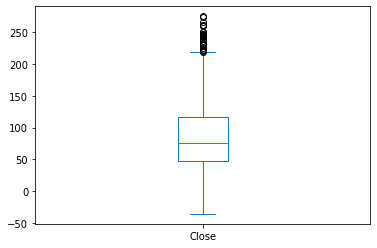

In [22]:
# Visualize the arbitrage spread from early in the dataset in a box plot
arbitrage_spread_early.plot(kind='box')

<AxesSubplot:title={'center':'Bitstamp vs Coinbase'}, xlabel='Timestamp'>

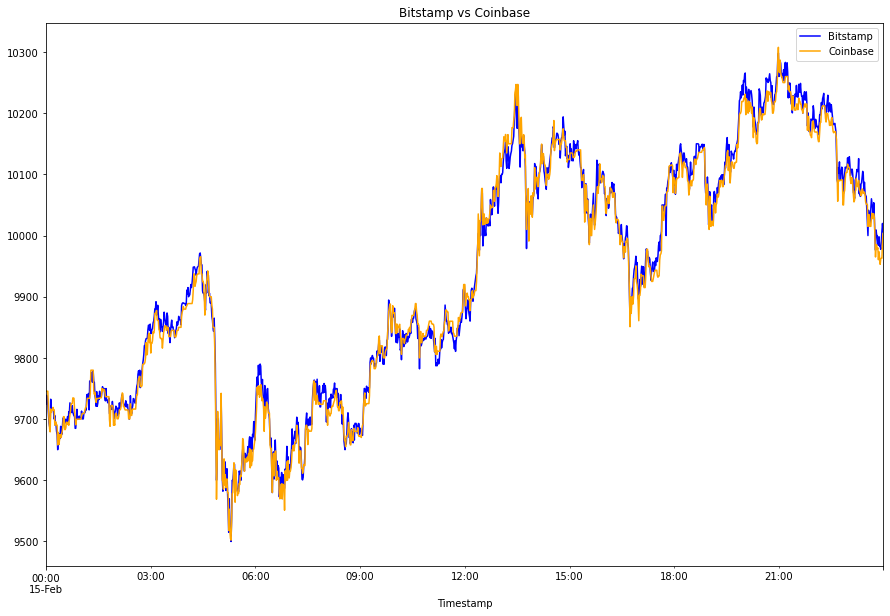

In [23]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from the middle of the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp_sliced['Close'].loc['2018/02/15'].plot(figsize=(15,10), color='blue', legend=True, title="Bitstamp vs Coinbase", label="Bitstamp", xlabel="Timestamp")
coinbase_sliced['Close'].loc['2018/02/15'].plot(figsize=(15,10), color="orange", legend=True, label="Coinbase")


In [24]:
# Using the date in the middle that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_middle = bitstamp_sliced.loc['2018/02/15'] - coinbase_sliced.loc['2018/02/15']

# Generate summary statistics 
arbitrage_spread_middle.describe()

,Close
count,1440.000000
mean,5.760007
std,14.908671
min,-48.800000
25%,-3.995000
50%,6.960000
75%,16.217500
max,55.470000


<AxesSubplot:>

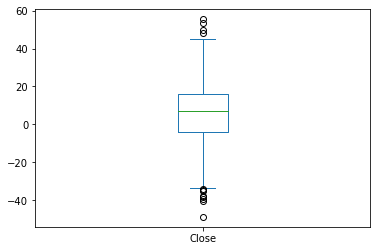

In [25]:
# Visualize the arbitrage spread from the middle of the dataset in a box plot
arbitrage_spread_middle.plot(kind='box')

<AxesSubplot:title={'center':'Bitstamp vs Coinbase 3/31/2018'}, xlabel='Timestamp'>

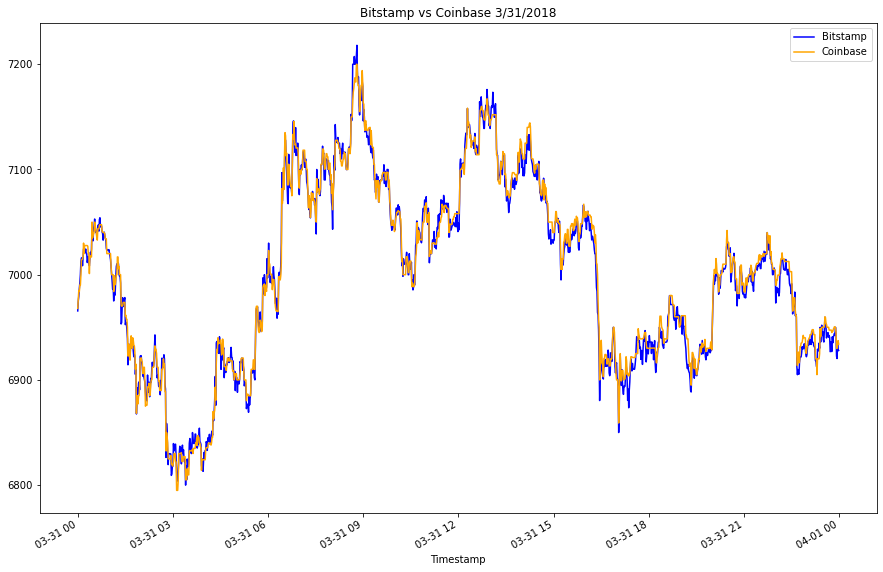

In [26]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from late in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp_sliced['Close'].loc['2018/03/31'].plot(figsize=(15,10), color='blue', legend=True, title="Bitstamp vs Coinbase 3/31/2018", label="Bitstamp", xlabel="Timestamp")
coinbase_sliced['Close'].loc['2018/03/31'].plot(figsize=(15,10), color="orange", legend=True, label="Coinbase")

In [27]:
# Using the date from the late that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_late = coinbase_sliced.loc['2018/03/31'] - bitstamp_sliced.loc['2018/03/31']

# Generate summary statistics for the late DataFrame
arbitrage_spread_late.describe()

,Close
count,1434.000000
mean,2.348675
std,8.109623
min,-35.000000
25%,-2.537500
50%,2.300000
75%,7.627500
max,35.980000


<AxesSubplot:>

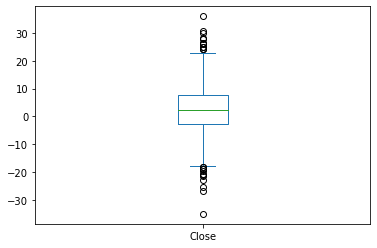

In [28]:
# Visualize the arbitrage spread from late in the dataset in a box plot
arbitrage_spread_late.plot(kind="box")

### Step 4: Calculate the Arbitrage Profits

Calculate the potential profits for each date that you selected in the previous section. Your goal is to determine whether arbitrage opportunities still exist in the Bitcoin market. Complete the following steps:

1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

6. Generate the summary statistics, and plot the results for each of the three DataFrames.

7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

(NOTE: The starter code displays only one date. You'll want to do this analysis for two additional dates).

#### 1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

*NOTE*: For illustration, only one of the three dates is shown in the starter code below.

In [29]:
# For the date early in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
### NOTE: unlcear about instructions here; it seems we just calculated these spreads above, and
### now being asked to repeat ourselves. instead, I updated the variable value to exclude negative spreads.
arbitrage_spread_early = arbitrage_spread_early[arbitrage_spread_early>0]
arbitrage_spread_middle = arbitrage_spread_middle[arbitrage_spread_middle>0]
arbitrage_spread_late = arbitrage_spread_late[arbitrage_spread_late >0]

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
arbitrage_spread_early.describe()
arbitrage_spread_middle.describe()
arbitrage_spread_late.describe()


,Close
count,913.000000
mean,7.013461
std,5.438677
min,0.010000
25%,2.680000
50%,6.010000
75%,10.000000
max,35.980000


#### 2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

In [30]:
# For the date early in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_early = arbitrage_spread_early / coinbase_sliced.loc['2018/01/27']
spread_return_middle = arbitrage_spread_middle / coinbase_sliced.loc['2018/02/15']
spread_return_late = arbitrage_spread_late / bitstamp_sliced.loc['2018/03/31']

# Review the spread return DataFrame
spread_return_early
spread_return_middle
spread_return_late.describe()

,Close
count,913.000000
mean,0.001003
std,0.000780
min,0.000001
25%,0.000383
50%,0.000864
75%,0.001434
max,0.005167


#### 3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

In [33]:
# For the date early in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_early = spread_return_early[spread_return_early > .01]
#profitable_trades_early = profitable_trades_early.dropna()

profitable_trades_middle = spread_return_middle[spread_return_middle> .01]
#profitable_trades_middle = profitable_trades_middle.dropna()

profitable_trades_late = spread_return_late[spread_return_late > .01]
#profitable_trades_late = profitable_trades_late.dropna()

# Review the first five profitable trades
profitable_trades_early.head()
profitable_trades_middle.head()
profitable_trades_late.head()

,Close
Timestamp,
2018-03-31 00:00:00,NaN
2018-03-31 00:01:00,NaN
2018-03-31 00:02:00,NaN
2018-03-31 00:03:00,NaN
2018-03-31 00:04:00,NaN


#### 4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

In [215]:
# For the date early in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
profitable_trades_early.describe()

,Close
count,382.000000
mean,0.013429
std,0.002947
min,0.010006
25%,0.011299
50%,0.012674
75%,0.014792
max,0.023999


#### 5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

In [39]:
# For the date early in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_early = profitable_trades_early * coinbase_sliced.loc['2018/01/27']

# Drop any missing values from the profit DataFrame
profit_per_trade_early = profit_early.dropna()

# View the early profit DataFrame
profit_per_trade_early

,Close
Timestamp,
2018-01-27 00:19:00,110.68
2018-01-27 03:12:00,115.97
2018-01-27 12:16:00,117.84
2018-01-27 12:17:00,117.00
2018-01-27 12:18:00,128.63
...,...
2018-01-27 23:55:00,242.38
2018-01-27 23:56:00,248.00
2018-01-27 23:57:00,251.00


#### 6. Generate the summary statistics, and plot the results for each of the three DataFrames.

In [40]:
# Generate the summary statistics for the early profit per trade DataFrame
### NOTE: only generated stats for the early date because middle and late dates have 0 proftable trades.
profit_per_trade_early.describe()


,Close
count,382.000000
mean,152.383927
std,33.701052
min,110.680000
25%,128.072500
50%,143.640000
75%,168.005000
max,275.380000


<AxesSubplot:xlabel='Timestamp'>

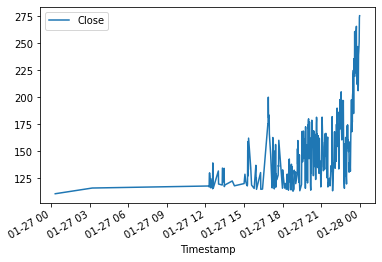

In [41]:
# Plot the results for the early profit per trade DataFrame
profit_per_trade_early.plot()

#### 7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

In [223]:
# Calculate the sum of the potential profits for the early profit per trade DataFrame
profit_per_trade_early.sum()

Close    58210.66
dtype: float64

#### 8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

In [228]:
# Use the cumsum function to calculate the cumulative profits over time for the early profit per trade DataFrame
cumulative_profit_early = profit_per_trade_early.cumsum()
cumulative_profit_early


,Close
Timestamp,
2018-01-27 00:19:00,110.68
2018-01-27 03:12:00,226.65
2018-01-27 12:16:00,344.49
2018-01-27 12:17:00,461.49
2018-01-27 12:18:00,590.12
...,...
2018-01-27 23:55:00,57162.60
2018-01-27 23:56:00,57410.60
2018-01-27 23:57:00,57661.60


<AxesSubplot:title={'center':'Cumulative Sum - Early Date'}, xlabel='Timestamp'>

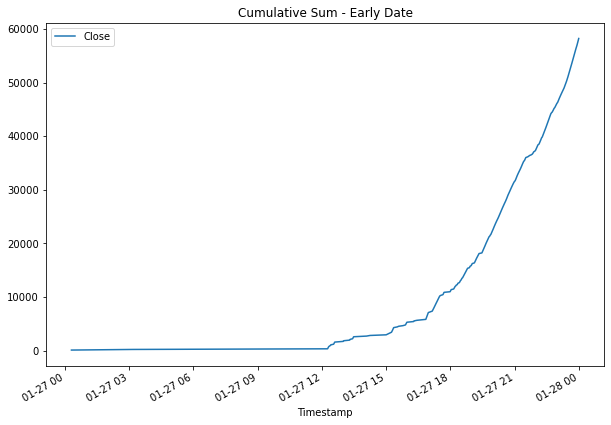

In [227]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
cumulative_profit_early.plot(figsize=(10, 7), title="Cumulative Sum - Early Date")

**Question:** After reviewing the profit information across each date from the different time periods, can you identify any patterns or trends?
    
**Answer:** Three dates were selected in comparative Bitcoin exchanges (Bitstamp and Coinbase) during the first quarter of 2018: (early)2018/01/27, (middle)2018/02/15, and (late)2018/03/31. For each date, a dataframe containing the Timestamps and closing prices were created from both indexes (Bitstamp and Coinbase). The spread between both indexes was determined by calculating the difference between closing prices on comparative Timestamps. These spreads were further filtered to those >1% to account for the 1% trading fees. There was considerable profit potential on the early date, but 0 profitable trades on the selected middle and late dates. based on this selection, the arbitrage opportunities changed significantly over this timeframe. 


In [34]:
#Here is a dataframe summary of the trade opportunities on the early date that are >1%, and thus have profit potential:
profitable_trades_early.describe()

,Close
count,382.000000
mean,0.013429
std,0.002947
min,0.010006
25%,0.011299
50%,0.012674
75%,0.014792
max,0.023999


In [35]:
#And here is the summary of profitable trades on the middle date (there are none)
profitable_trades_middle.describe()

,Close
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


In [36]:
#And again on the third date, no profitable trades:
profitable_trades_late.describe()

,Close
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


<AxesSubplot:xlabel='Timestamp'>

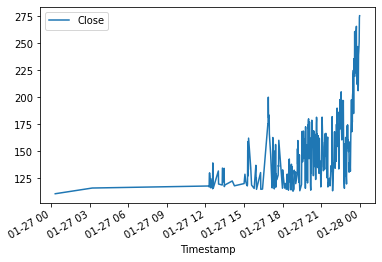

In [42]:
#Here is a line chart of the profit potential on the early date:
profit_per_trade_early.plot()

<AxesSubplot:xlabel='Timestamp'>

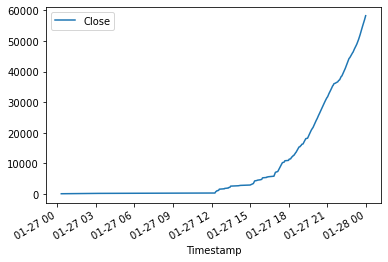

In [43]:
#Here is a Cumulative Sum chart on this early date:
profit_per_trade_early.cumsum().plot()